# Feature Sets
**Suggested time to spend on exercise**: 20 minutes

In this exercise, we'll create a good, minimal set of features.

So far, we've thrown all of our features into the model. In this exercise, we'll reduce the number of features, yielding a leaner model that performs just as well. Models with fewer features are easier to maintain and take fewer resources than those with more features.

As before, let's load up and prepare our data.

In [0]:
#@test {"output": "ignore"}

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.google as tf
from IPython import display
from google3.pyglib import gfile
from sklearn import metrics

def preprocess_features(california_housing_dataframe):
  """This function takes an input dataframe and returns a version of it that has
  various features selected and pre-processed.  The input dataframe is expected
  to contain data from the california_housing data set."""
  output_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housingMedianAge",
     "totalRooms",
     "totalBedrooms",
     "population",
     "households",
     "medianIncome"]].copy()
  output_features["roomsPerPerson"] = (
    california_housing_dataframe["totalRooms"] /
    california_housing_dataframe["population"])
  # Feel free to add other synthetic features here.
  return output_features


def preprocess_targets(california_housing_dataframe):
  """This function selects and potentially transforms the output target from
  a dataframe containing data from the california_housing data set.  Object
  returned is a pandas Series."""
  output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
  output_targets["medianHouseValue"] = (
    california_housing_dataframe["medianHouseValue"] / 1000.0)
  return output_targets


# Set the output display to have one digit for decimal places, for display
# readability only.
pd.options.display.float_format = '{:.1f}'.format

# Load in the raw data.  Note that there's a separate test data set that we
# will leave untouched for now.
raw_training_df = pd.read_csv(
  gfile.Open("/placer/prod/home/ami/mlcc/california_housing/v1/train.csv"),
  sep=",")
# Randomize the data before selecting train / validation splits.
raw_training_df = raw_training_df.reindex(np.random.permutation(
  raw_training_df.index))

# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(raw_training_df.head(12000))
training_targets = preprocess_targets(raw_training_df.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(raw_training_df.tail(5000))
validation_targets = preprocess_targets(raw_training_df.tail(5000))

# Sanity check that we've done the right thing.
print "Training examples summary:"
display.display(training_examples.describe())
print "Validation examples summary:"
display.display(validation_examples.describe())

print "Training targets summary:"
display.display(training_targets.describe())
print "Validation targets summary:"
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,roomsPerPerson
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.5,2659.3,541.9,1435.4,503.4,3.9,2.0
std,2.1,2.0,12.5,2207.9,427.9,1176.7,389.9,1.9,1.2
min,32.5,-124.3,1.0,2.0,1.0,3.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1470.0,298.0,792.0,282.0,2.6,1.5
50%,34.3,-118.5,29.0,2131.0,434.0,1167.5,409.0,3.6,1.9
75%,37.7,-118.0,37.0,3160.0,651.0,1723.2,606.0,4.8,2.3
max,42.0,-114.5,52.0,37937.0,6445.0,35682.0,6082.0,15.0,52.0


Validation examples summary:


,latitude,longitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,roomsPerPerson
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.5,28.7,2606.1,533.4,1415.7,496.0,3.9,2.0
std,2.2,2.0,12.7,2111.0,405.8,1075.4,371.2,1.9,1.2
min,32.5,-124.3,2.0,11.0,3.0,9.0,2.0,0.5,0.1
25%,33.9,-121.8,18.0,1433.0,293.0,782.0,281.0,2.6,1.5
50%,34.2,-118.5,29.0,2119.0,433.0,1165.0,408.0,3.5,1.9
75%,37.7,-118.0,37.0,3124.2,647.0,1715.2,602.0,4.7,2.3
max,42.0,-114.3,52.0,32054.0,5290.0,15507.0,5050.0,15.0,55.2


Training targets summary:


,medianHouseValue
count,12000.0
mean,207.9
std,115.8
min,15.0
25%,120.7
50%,181.0
75%,265.9
max,500.0


Validation targets summary:


,medianHouseValue
count,5000.0
mean,205.8
std,116.3
min,15.0
25%,117.7
50%,178.8
75%,262.5
max,500.0


### Task 1: Develop a good feature set.

**What's the best performance you can get with just 2 or 3 features?**

A **correlation matrix** shows pairwise correlations, both for each feature compared to the target and for each feature compared to other features.

Here, correlation is defined as the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient).  You don't have to understand the mathematical details for this exercise.

Correlation values have the following meanings:

  * `-1.0`: perfect negative correlation
  * `0.0`: no correlation
  * `1.0`: perfect positive correlation

In [0]:
#@test {"output": "ignore"}

correlation_dataframe = training_examples
correlation_dataframe["target"] = training_targets["medianHouseValue"]

display.display(correlation_dataframe.corr())

,latitude,longitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,roomsPerPerson,target
latitude,1.0,-0.9,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,0.1,-0.1
longitude,-0.9,1.0,-0.1,0.1,0.1,0.1,0.1,-0.0,-0.1,-0.1
housingMedianAge,0.0,-0.1,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,-0.1,0.1
totalRooms,-0.0,0.1,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
totalBedrooms,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,-0.1,0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.1,-0.0
households,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,0.0,-0.0,0.1
medianIncome,-0.1,-0.0,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.2,0.7
roomsPerPerson,0.1,-0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,1.0,0.2
target,-0.1,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,0.2,1.0


Ideally, we'd like to have features that are strongly correlated with the target.

We'd also like to have features that aren't so strongly correlated with each other, so that they add independent information.

Use this information to try removing features.  You can also try developing additional synthetic features, such as ratios of two raw features.

For convenience, we've included the training code from the previous exercise.

Spend 5 minutes searching for a good set then run the hint cell block below to see what we chose. Don't forget that different features may require different learning parameters.

Training model...
RMSE (on training data):
  period 00 : 107.49
  period 01 : 98.99
  period 02 : 92.93
  period 03 : 88.80
  period 04 : 86.34
  period 05 : 84.83
  period 06 : 83.97
  period 07 : 83.56
  period 08 : 83.36
  period 09 : 83.28
Final RMSE (on training data): 83.28
Final RMSE (on validation data): 84.89


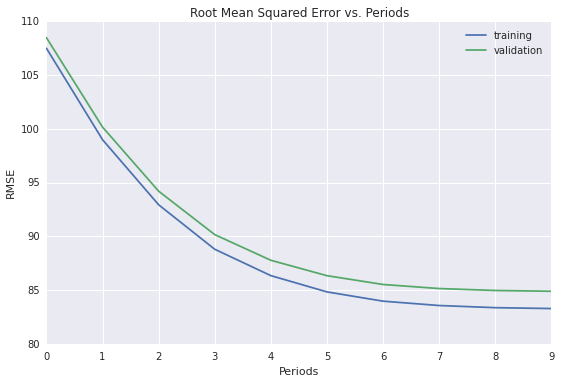

In [0]:
#@test {"skip": true}

LEARNING_RATE = 0.01  #@param
STEPS = 10000  #@param
BATCH_SIZE = 5  #@param
periods = 10
steps_per_period = STEPS / periods

#
# Your code here: add your features of choice as a list of quoted strings.
#
# Depending on the features you choose, you may need to tweak the learning
# rate and number of steps.

minimal_features = ["roomsPerPerson","medianIncome","latitude"]

assert minimal_features, "You must select at least one feature!"

minimal_training_examples = training_examples[minimal_features]
minimal_validation_examples = validation_examples[minimal_features]

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(
  minimal_training_examples)
linear_regressor = tf.contrib.learn.LinearRegressor(
  feature_columns=feature_columns,
  optimizer=tf.GradientDescentOptimizer(learning_rate=LEARNING_RATE),
  gradient_clip_norm=5.0
)

print "Training model..."
print "RMSE (on training data):"
training_rmse = []
validation_rmse = []
for period in range (0, periods):
  linear_regressor.fit(
    minimal_training_examples,
    training_targets,
    steps=steps_per_period,
    batch_size=BATCH_SIZE
  )
  training_predictions = linear_regressor.predict(minimal_training_examples)
  validation_predictions = linear_regressor.predict(minimal_validation_examples)
  training_root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(training_predictions, training_targets))
  validation_root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(validation_predictions, validation_targets))
  print "  period %02d : %0.2f" % (period, training_root_mean_squared_error)
  training_rmse.append(training_root_mean_squared_error)
  validation_rmse.append(validation_root_mean_squared_error)

plt.ylabel("RMSE")
plt.xlabel("Periods")
plt.title("Root Mean Squared Error vs. Periods")
plt.tight_layout()
plt.plot(training_rmse, label="training")
plt.plot(validation_rmse, label="validation")
plt.legend()

print ("Final RMSE (on training data): %0.2f" % training_root_mean_squared_error)
print ("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)

In [0]:
#@title Run Me for a hint

#@test {"output": "ignore"}

print """
         Try these features:

             "medianIncome"
             "latitude"

         Along with these parameters:

             LEARNING_RATE = 0.01
             STEPS = 500
      """

### Task 2: Make better use of latitude.

**Try creating some synthetic features that do a better job with latitude.**

Plotting `latitude` vs. `medianHouseValue` shows that there really isn't a linear relationship there.

Instead, there are a couple of peaks, which roughly correspond to Los Angeles and San Francisco.

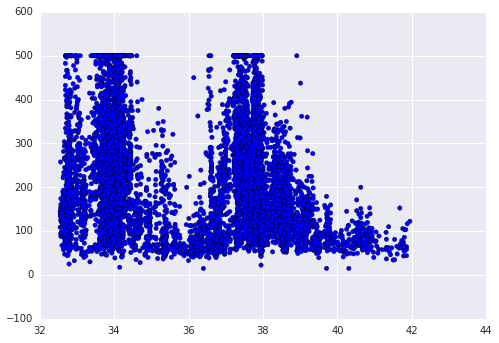

In [8]:
#@test {"output": "ignore"}

plt.scatter(training_examples["latitude"], training_targets["medianHouseValue"])

For example, you could have a feature that maps `latitude` to a value of `|latitude - 38|`, and call this `DistanceFromSanFranciso`.

Or you could break the space into 10 different buckets.  `Latitude32to33`, `Latitude33to34`, etc., each showing a value of `1.0` if `latitude` is within that bucket range and a value of `0.0` otherwise.

Use the correlation matrix to help guide development, and then add them to your model if you find something that looks good.

What's the best validation performance you can get?

  period 00 : 181.97
  period 01 : 132.02
  period 02 : 95.34
  period 03 : 84.75
  period 04 : 83.95
  period 05 : 84.18
  period 06 : 84.28
  period 07 : 84.25
  period 08 : 84.18
  period 09 : 84.10
Final RMSE (on training data): 84.10
Final RMSE (on validation data): 86.08


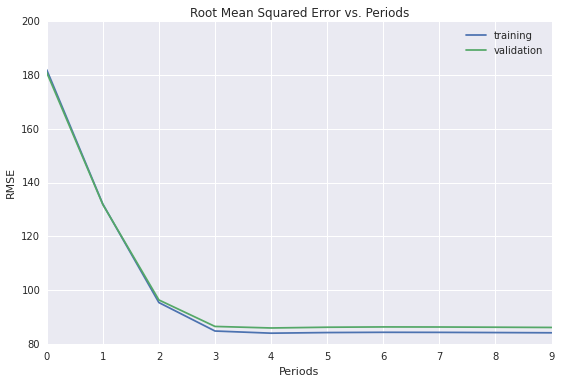

In [0]:
#@title To view a possible solution, toggle Form

#@test {"output": "ignore"}

LEARNING_RATE = 0.05
STEPS = 500
BATCH_SIZE = 5
periods = 10
steps_per_period = STEPS / periods

# Only select a minimum of features, aside from latitude.
selected_features = [
  "medianIncome","roomsPerPerson"
]

#
# Solution: let's bucketize the latitude. This is fairly straightforward with
# Series.apply.
#

LATITUDE_RANGES = zip(xrange(32, 44), xrange(33, 45))

def add_bucketized_latitude(source_df, target_df):
  for r in LATITUDE_RANGES:
    target_df["Latitude%dto%d" % r] = source_df["latitude"].apply(
      lambda l: 1.0 if l >= r[0] and l < r[1] else 0.0)

# Create a new DataFrame with the selected features.
selected_training_examples = training_examples[selected_features].copy()
selected_validation_examples = validation_examples[selected_features].copy()

# Add the bucketized latitude.
add_bucketized_latitude(training_examples, selected_training_examples)
add_bucketized_latitude(validation_examples, selected_validation_examples)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(
  selected_training_examples)
linear_regressor = tf.contrib.learn.LinearRegressor(
  feature_columns=feature_columns,
  optimizer=tf.GradientDescentOptimizer(learning_rate=LEARNING_RATE),
  gradient_clip_norm=5.0
)

training_rmse = []
validation_rmse = []
for period in range (0, periods):
  linear_regressor.fit(
    selected_training_examples,
    training_targets,
    steps=steps_per_period,
    batch_size=BATCH_SIZE
  )
  training_predictions = linear_regressor.predict(selected_training_examples)
  validation_predictions = linear_regressor.predict(selected_validation_examples)
  training_root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(training_predictions, training_targets))
  validation_root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(validation_predictions, validation_targets))
  print "  period %02d : %0.2f" % (period, training_root_mean_squared_error)
  training_rmse.append(training_root_mean_squared_error)
  validation_rmse.append(validation_root_mean_squared_error)

plt.ylabel("RMSE")
plt.xlabel("Periods")
plt.title("Root Mean Squared Error vs. Periods")
plt.tight_layout()
plt.plot(training_rmse, label="training")
plt.plot(validation_rmse, label="validation")
plt.legend()

print ("Final RMSE (on training data): %0.2f" % training_root_mean_squared_error)
print ("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)